In [1]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df = pd.read_csv('/home/kkumar/Workspace/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
model = Prophet()
model.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kkumar/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.429022,8.907890
3266,2017-01-16,8.524244,7.779980,9.296834
3267,2017-01-17,8.311615,7.641843,9.013661
3268,2017-01-18,8.144232,7.428015,8.899114
3269,2017-01-19,8.156091,7.406783,8.869022


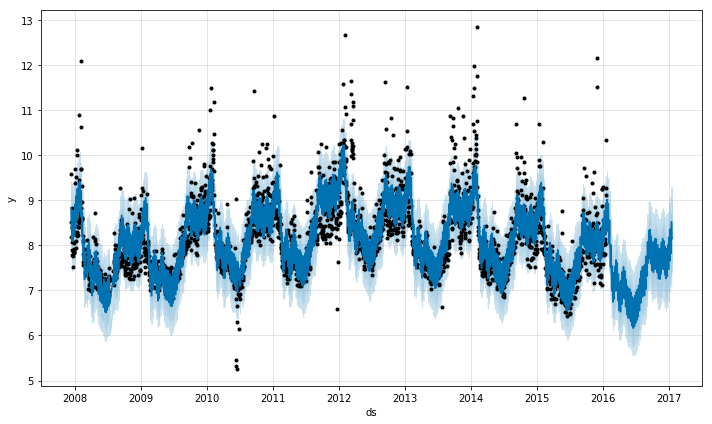

In [9]:
Fig1 = model.plot(forecast)

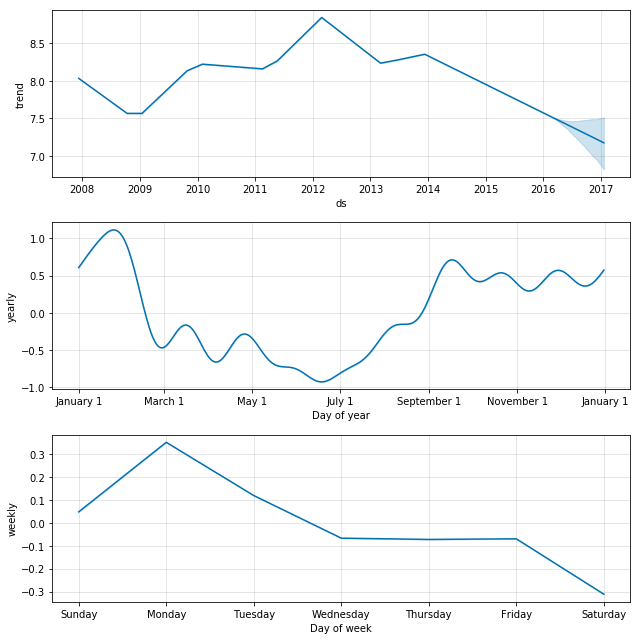

In [10]:
Fig2 = model.plot_components(forecast)

### Adding Superbowl for both playoffs games and superbowl games.

In [11]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [13]:
superbowls

,ds,holiday,lower_window,upper_window
0,2010-02-07,superbowl,0,1
1,2014-02-02,superbowl,0,1
2,2016-02-07,superbowl,0,1


In [14]:
holiday_model = Prophet(holidays=holidays)
forecast = holiday_model.fit(df).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kkumar/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.229999,1.176410
2191,2014-02-03,1.900543,1.486962
2532,2015-01-11,1.229999,0.000000
2533,2015-01-12,1.900543,0.000000
2901,2016-01-17,1.229999,0.000000
2902,2016-01-18,1.900543,0.000000
2908,2016-01-24,1.229999,0.000000
2909,2016-01-25,1.900543,0.000000
2922,2016-02-07,1.229999,1.176410
2923,2016-02-08,1.900543,1.486962


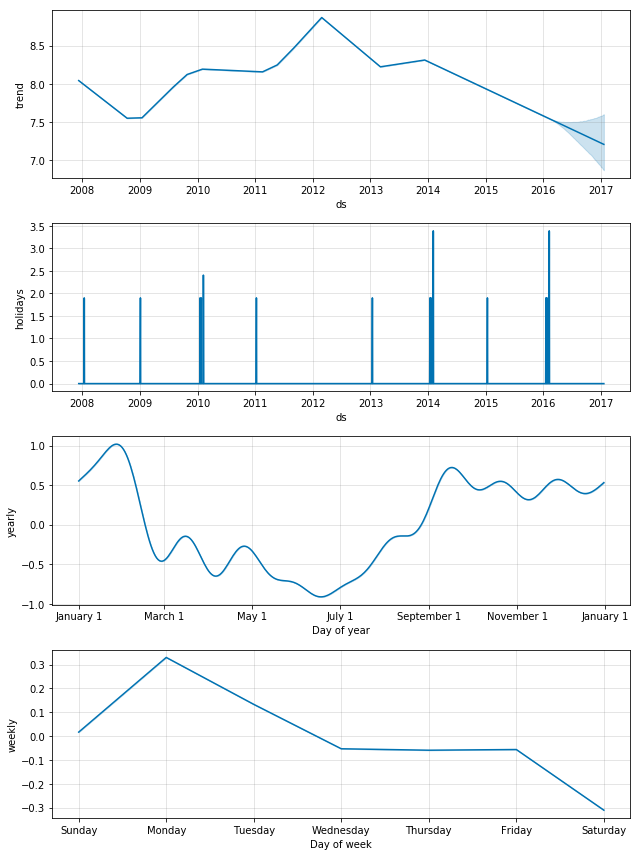

In [16]:
holiday_model.plot_components(forecast);

### Prior scale for holidays and seasonality

#### For tuning seasonality and holidays

In [19]:
prior_holiday_model = Prophet(holidays=holidays, holidays_prior_scale=1, seasonality_prior_scale=1).fit(df)
forecast = prior_holiday_model.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kkumar/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,playoff,superbowl
2190,2014-02-02,1.225515,1.188626
2191,2014-02-03,1.900439,1.459077
2532,2015-01-11,1.225515,0.000000
2533,2015-01-12,1.900439,0.000000
2901,2016-01-17,1.225515,0.000000
2902,2016-01-18,1.900439,0.000000
2908,2016-01-24,1.225515,0.000000
2909,2016-01-25,1.900439,0.000000
2922,2016-02-07,1.225515,1.188626
2923,2016-02-08,1.900439,1.459077


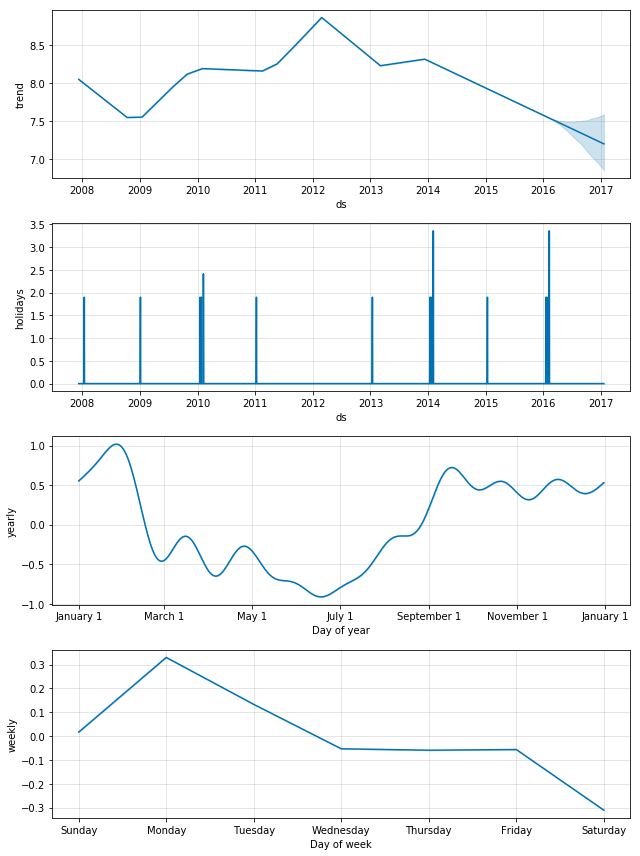

In [20]:
prior_holiday_model.plot_components(forecast);